# Truck Vs Rig Network

This network will classify a image of a truck or semi as a truck or a semi. 

## Why?

This is my first project for fast.ai's v3 course. 

## Data?

The data are images from the ImageNET dtaset, downloaded and cropped using a tool I created specifically to grab, crop, and scale images from the ImageNET dataset. For those who are interested, you can find out more about *grabber* [here](https://github.com/ScottVaverchak/ml-tools).

The standard dance. Set the notebook to reload extensions and show plots inline.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import *

In [4]:
bs = 64

# Data

Below we will import the data for training. Included in the GitHub repository is a archive of the data used to train the network. For those who are interested, below are the two URL's from ImageNET where you can find the images used to train the network:

 * [Semi Data Set](http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04467665)
 * [Pickup Data Set](http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n03930630)
 
If starting from stratch, there is a bit more work. Once downloaded, cropped, and resized, the manual process starts. Many of the images form the ImageNET URL links no longer work or send down bad data. As of this writing (01/28/2019), the success rate of downloading was around 60%, which included bad data and non-images. Due to this, there is a bit of manual sorting to get bad data out of the directories.

Once the sorting of bad data was compelete, I split the data set up into train, test, and validation sets (ImageNET style):

- dataset/
    - train/
        - truck/
        - semi/
    - test/
        - truck/
        - semi/
    - valid/
        - truck/
        - semi/
      

For those using the archive provided, the following cell will need to be run to extract the data

In [12]:
import tarfile

extract_directory = './'
filename = 'dataset.tar.gz'
tarfile.open(filename).extractall(extract_directory)
directory = './dataset'
data = ImageDataBunch.from_folder(directory, test='test')

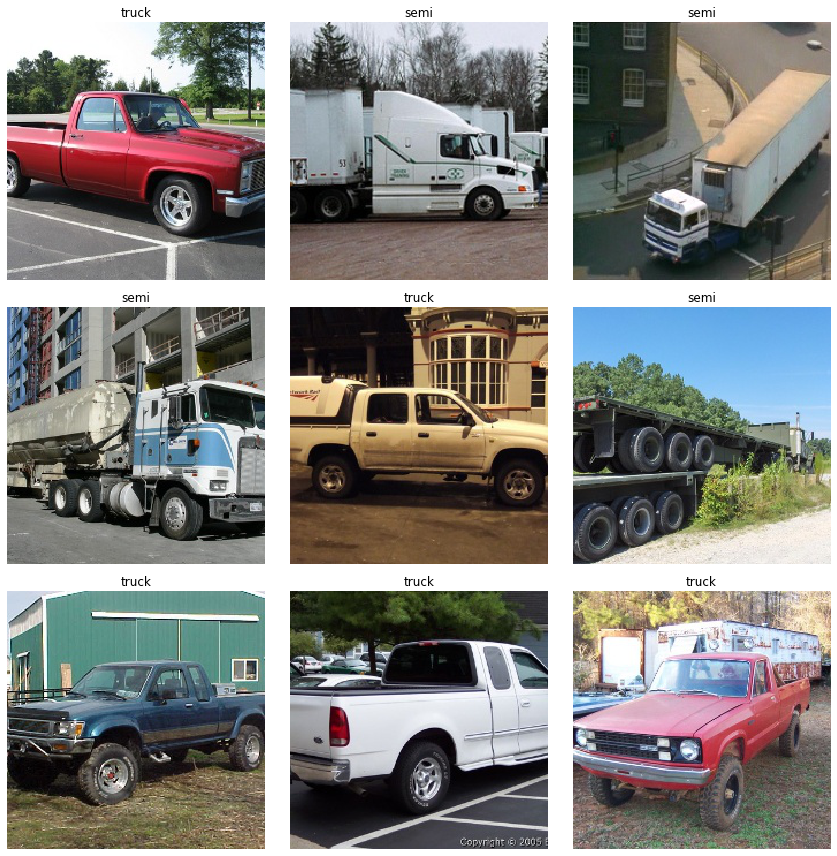

In [14]:
data.show_batch(rows=3, fig_size=(7,6))

In [15]:
print(len(data.classes))
print(data.classes)

2
['semi', 'truck']


## Training: resnet34

In order to follow allong with the course, we will be using the renet34 network to train our network. 

As with the class, we will start with 4 epochs and adjust as needed.

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/svavs/.cache/torch/checkpoints/resnet34-333f7ec4.pth


ImportError: IntProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html